In [1]:
from attitude_determination.cest import Centroider
from attitude_determination.cest import get_star_pixels
from attitude_determination.utils import get_k_top_centroids
import matplotlib.pyplot as plt
import cv2

## Using the API for plotting the centroids present in a given image

In [2]:
# METHOD 1

star_image = cv2.imread("stars-image.png", 0)

centroids = get_k_top_centroids(star_image, k_top=-1, location_only=False)

centroider = Centroider()

method1 = centroider.print_centroids(star_image, centroids, print_id=True)

In [3]:
# METHOD 2

# Pixels with magnitude above 150 will be considered as a possible centroid
star_pixels = get_star_pixels(star_image, threshold=150)

# max_cdpus holds the maximum number of centroids that will be evaluated.
centroider = Centroider(max_cdpus=60, distance_threshold=10)

centroids = centroider.compute_from_list(star_pixels, weight=0.8)

method2 = centroider.print_centroids(star_image, centroids, print_id=True)

Text(0.5, 1.0, 'method 2')

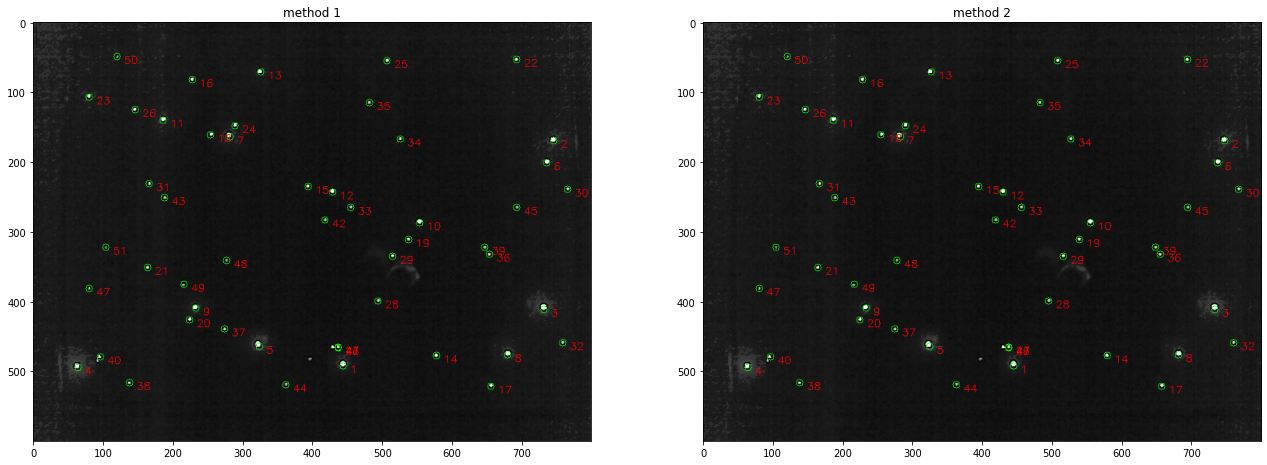

In [4]:
plt.figure(figsize=(22,18))
plt.subplot(121)
plt.imshow(method1)
plt.title("method 1")
plt.subplot(122)
plt.imshow(method2)
plt.title("method 2")

# Saving the centroids in a CSV file

In [5]:
# Pixels with magnitude above 150 will be considered as a possible centroid
star_pixels = get_star_pixels(star_image, threshold=150)

# max_cdpus holds the maximum number of centroids that will be evaluated.
centroider = Centroider(max_cdpus=60, distance_threshold=10)

_ = centroider.compute_from_list(star_pixels, weight=0.8)

centroider.save_centroids("centroids.csv")

# Building an image from a CSV file

Text(0.5, 1.0, 'method 3')

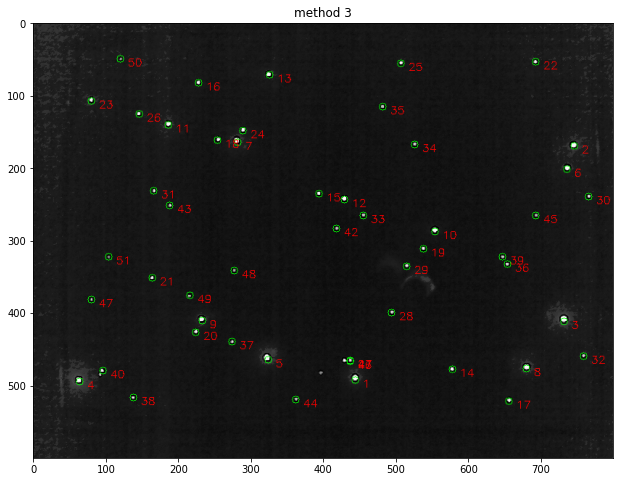

In [6]:
centroider = Centroider()
centroider.load_centroids("centroids.csv")

centroids = centroider.get_centroids()

method3 = centroider.print_centroids(star_image, centroids, print_id=True)

plt.figure(figsize=(12,8))
plt.imshow(method3)
plt.title("method 3")